In [ ]:
#default_exp peakmaps 

# Peak slice maps (working on it)

> Slicing the cube  

In [ ]:
#hide 
%load_ext autoreload
%autoreload 2 
%matplotlib notebook

In [ ]:
# hide 
import os 
os.chdir('/home/frank/Work/Projecten/DoRe/viz/raw_nmf')

In [ ]:
#hide 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib notebook

In [ ]:
import skimage.exposure as ske

In [ ]:
from maxrf4u import DataStack, HotmaxAtlas, get_hotslices, get_peakmaps, multi_plot, plot_peakslices  

ds = DataStack('RP-T-1898-A-3689.datastack') 

x_keVs = ds.read('maxrf_energies')
y_max = ds.read('maxrf_maxspectrum') 
cube = ds.read('maxrf_cube', compute=False) # don't load into memory yet (too big) 
imvis_reg_highres = ds.read('imvis_reg_highres') 
imvis_reg = ds.read('imvis_reg') 
imvis_extent = ds.read('imvis_extent')

hma = HotmaxAtlas('RP-T-1898-A-3689.datastack')

## How about Calcium?

In [ ]:
n = 5

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack')

Computing slice 0/9
[########################################] | 100% Completed |  6.5s
Computing slice 1/9
[########################################] | 100% Completed |  5.3s
Computing slice 2/9
[########################################] | 100% Completed |  9.5s
Computing slice 3/9
[########################################] | 100% Completed |  6.1s
Computing slice 4/9
[########################################] | 100% Completed |  3.2s
Computing slice 5/9
[########################################] | 100% Completed |  6.1s
Computing slice 6/9
[########################################] | 100% Completed |  3.2s
Computing slice 7/9
[########################################] | 100% Completed |  6.2s
Computing slice 8/9
[########################################] | 100% Completed |  5.8s
Computing slice 9/9
[########################################] | 100% Completed |  6.3s


<IPython.core.display.Javascript object>


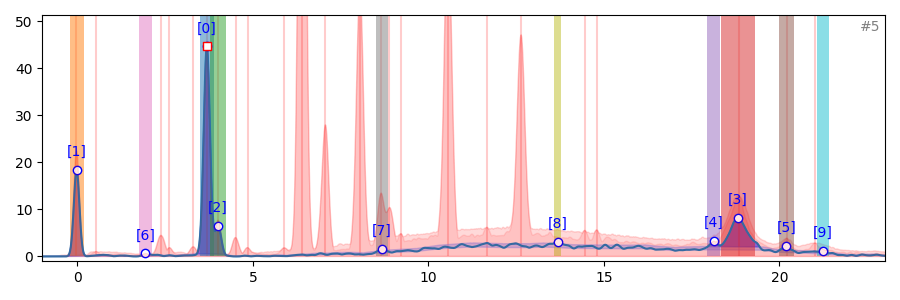

In [ ]:
ax, labels = hma.plot_spectrum(n) 
plot_peakslices(x_keVs, slices, ax=ax);

<IPython.core.display.Javascript object>


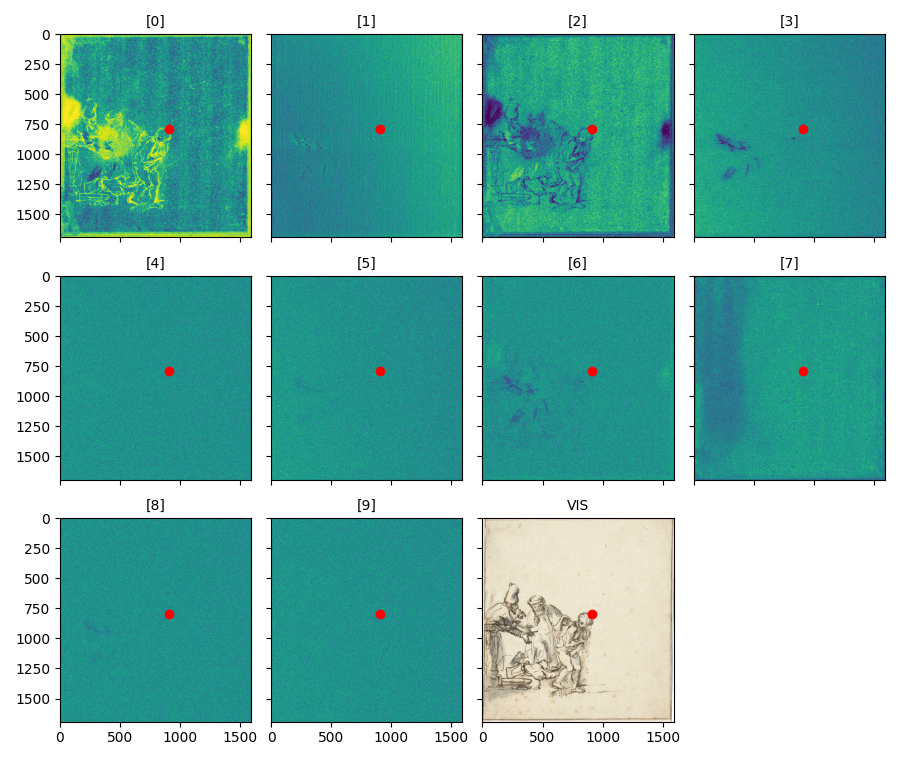

In [ ]:
titles = [f'[{i}]' for i in range(len(slices))]
titles.append('VIS')

peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel);

Let's check if peak #5[6]  is an escape peak for Ca_Ka by calculating the energy shift.... 

In [ ]:
peak_idxs = hma.peak_idxs_list[5]

In [ ]:
x_keVs[peak_idxs[0]] - x_keVs[peak_idxs[6]]

1.7459311050874269

**Indeed!!**

There is much more to be learned from this overview, but before going into this let's look at other elements. 

## How about Manganese? 

Let's create a similar peak map overview for the hotmax spectrum corresponding to Fe_Ka. This is hotmax spectrum #10. Also of interest are the related hotmax spectra for manganese #9 and for Fe_Kb #11. 

In [ ]:
n = 9 # Mn

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack')

Computing slice 0/10
[########################################] | 100% Completed |  5.4s
Computing slice 1/10
[########################################] | 100% Completed |  3.6s
Computing slice 2/10
[########################################] | 100% Completed |  6.4s
Computing slice 3/10
[########################################] | 100% Completed |  5.7s
Computing slice 4/10
[########################################] | 100% Completed |  6.2s
Computing slice 5/10
[########################################] | 100% Completed |  5.7s
Computing slice 6/10
[########################################] | 100% Completed |  3.6s
Computing slice 7/10
[########################################] | 100% Completed |  5.7s
Computing slice 8/10
[########################################] | 100% Completed |  6.6s
Computing slice 9/10
[########################################] | 100% Completed |  5.9s
Computing slice 10/10
[########################################] | 100% Completed |  6.1s


<IPython.core.display.Javascript object>


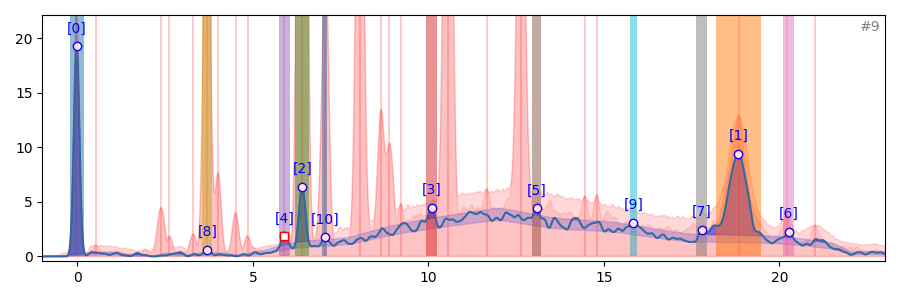

In [ ]:
ax, labels = hma.plot_spectrum(n) 
plot_peakslices(x_keVs, slices, ax=ax);

<IPython.core.display.Javascript object>


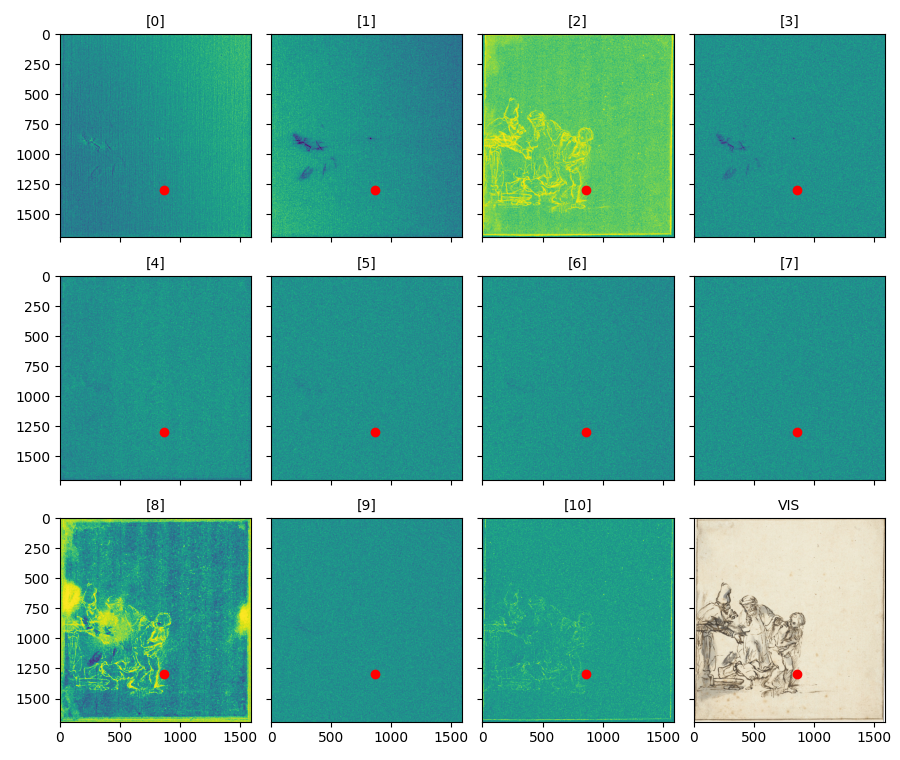

In [ ]:
titles = [f'[{i}]' for i in range(len(slices))]
titles.append('VIS')

peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel);

Mm, these histogram equalized peak maps aren't very informative. Most of the slices are just noise. I can not be sure how manganese and iron are correlated. Need to plot that in a different way. 

In [ ]:
FeKa_map = peak_maps[2]
MnKa_map = peak_maps[4]

<IPython.core.display.Javascript object>


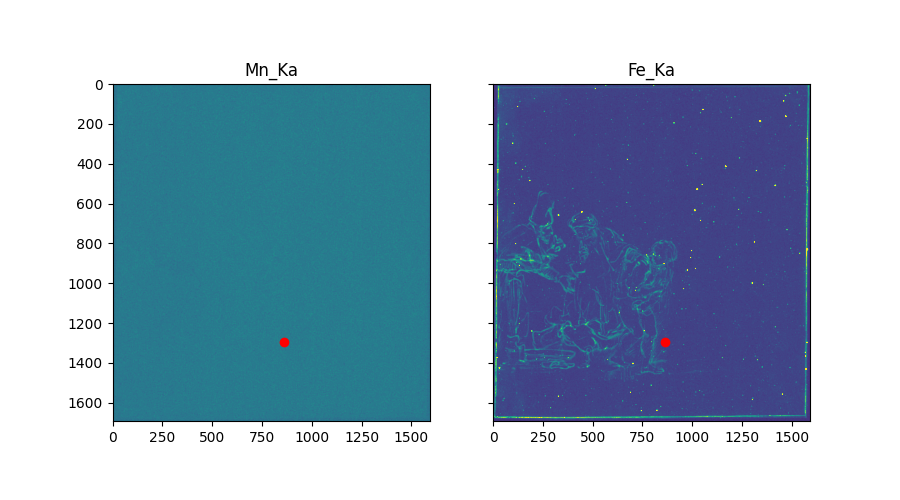

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=[9, 5])

ax.imshow(MnKa_map)
ax.set_title('Mn_Ka')

y, x, z = hot_pixel
ax.scatter([x], [y], c='r')
ax1.imshow(FeKa_map, vmax=2)
ax1.set_title('Fe_Ka')
ax1.scatter([x], [y], c='r');

My first question is, are there any other manganese speckles? And second, do the correlate with iron speckles, as I would expect? 

**This question needs to wait. Need speckle segmentation functions.**

## How about Iron?

In [ ]:
n = 10 # Fe_Ka

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack')

Computing slice 0/6
[########################################] | 100% Completed |  4.2s
Computing slice 1/6
[########################################] | 100% Completed |  3.2s
Computing slice 2/6
[########################################] | 100% Completed |  5.4s
Computing slice 3/6
[########################################] | 100% Completed |  3.8s
Computing slice 4/6
[########################################] | 100% Completed |  5.8s
Computing slice 5/6
[########################################] | 100% Completed |  6.6s
Computing slice 6/6
[########################################] | 100% Completed |  5.3s


<IPython.core.display.Javascript object>


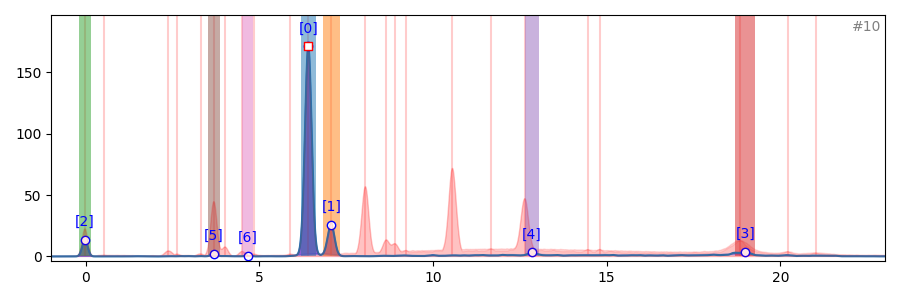

In [ ]:
ax, labels = hma.plot_spectrum(n) 
plot_peakslices(x_keVs, slices, ax=ax);

<IPython.core.display.Javascript object>


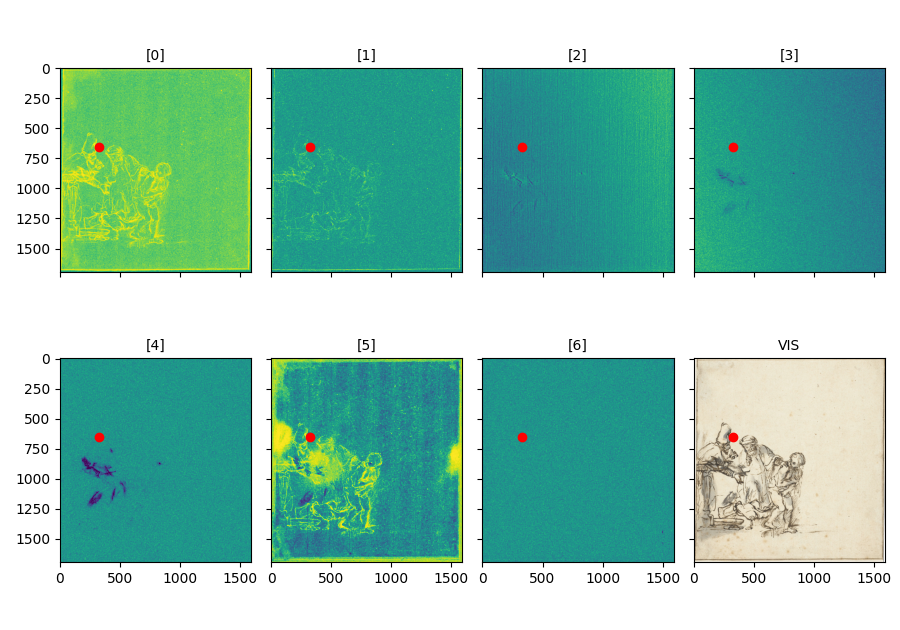

In [ ]:
titles = [f'[{i}]' for i in range(len(slices))]
titles.append('VIS')

peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel);

## How about Chlorine? 

In [ ]:
n = 3

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack')

Computing slice 0/10
[########################################] | 100% Completed |  5.4s
Computing slice 1/10
[########################################] | 100% Completed | 11.1s
Computing slice 2/10
[########################################] | 100% Completed |  6.5s
Computing slice 3/10
[########################################] | 100% Completed |  3.3s
Computing slice 4/10
[########################################] | 100% Completed |  6.2s
Computing slice 5/10
[########################################] | 100% Completed |  5.7s
Computing slice 6/10
[########################################] | 100% Completed |  6.7s
Computing slice 7/10
[########################################] | 100% Completed |  9.9s
Computing slice 8/10
[########################################] | 100% Completed |  3.0s
Computing slice 9/10
[########################################] | 100% Completed |  6.2s
Computing slice 10/10
[########################################] | 100% Completed |  5.5s


<IPython.core.display.Javascript object>


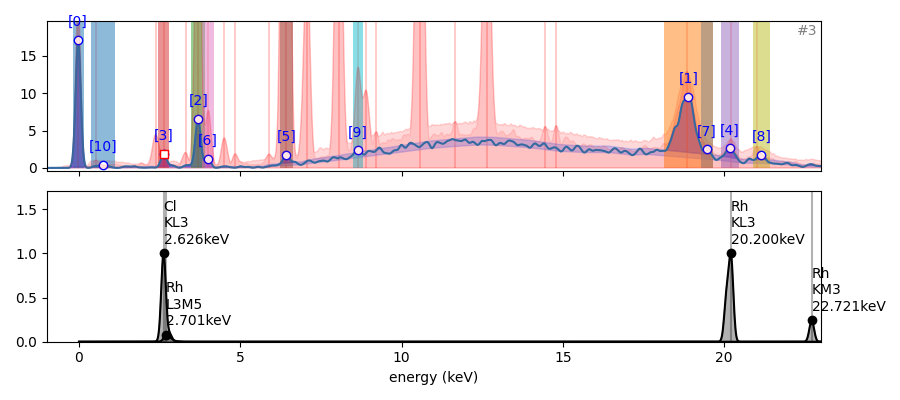

In [ ]:
import moseley as mos 
fig, [ax, ax1] = plt.subplots(nrows=2, sharex=True, figsize=[9, 4])
hma.plot_spectrum(n, ax=ax) 
plot_peakslices(x_keVs, slices, ax=ax);

ax1.set_ylim([0, 1.7])

mos.XFluo('Cl', tube_keV=30).plot(ax=ax1, color='k', peak_labels='full')
mos.XFluo('Rh', tube_keV=30).plot(ax=ax1, color='k', peak_labels='full')

In [ ]:
titles = [f'[{i}]' for i in range(len(slices))]
titles.append('VIS')
print(titles)

['[0]', '[1]', '[2]', '[3]', '[4]', '[5]', '[6]', '[7]', '[8]', '[9]', '[10]', 'VIS']


In [ ]:
titles = ['[0] Sensor', '[1] Compton Rh_Ka', '[2] Ca_Ka', '[3] Cl_Ka?', '[4]', '[5]', '[6]', '[7]', '[8]', '[9]', '[10]', 'VIS']

<IPython.core.display.Javascript object>


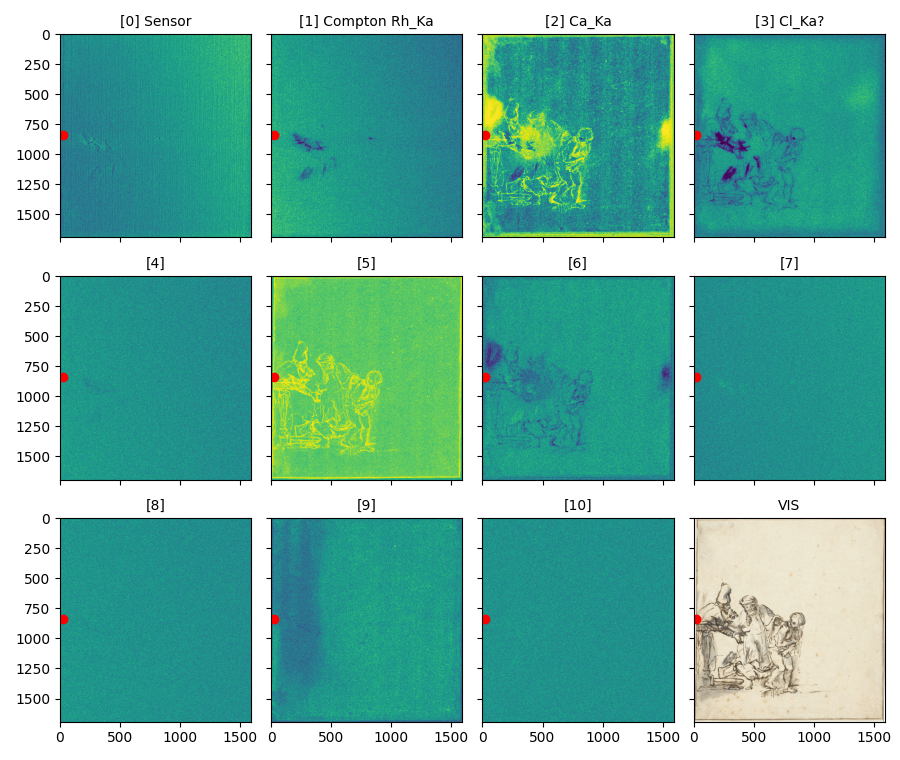

In [ ]:
peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel);

I would like to inspect the hotmax pixel... 

In [ ]:
ClKa_map = peak_maps[3]

<IPython.core.display.Javascript object>


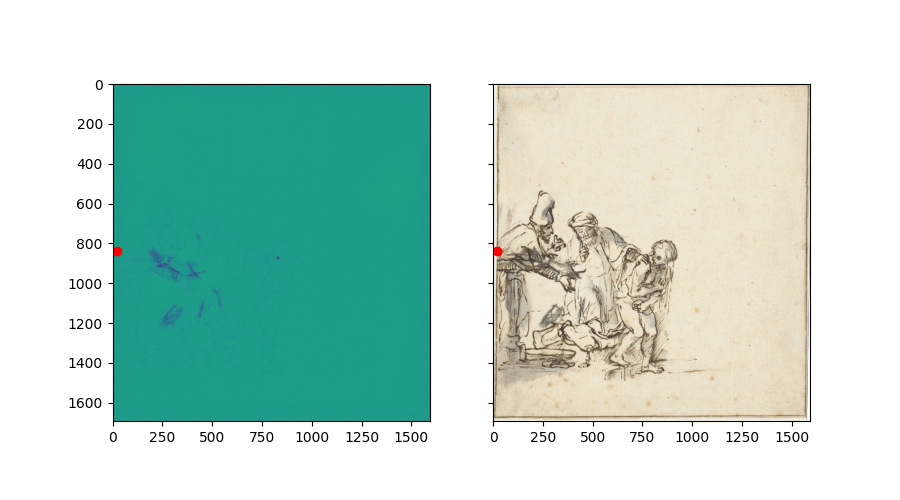

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=[9, 5])

y, x, z = hot_pixel

ax.imshow(ClKa_map)
ax1.imshow(imvis_reg)
ax.scatter(x, y, c='r')
ax1.scatter(x, y, c='r');

Seems to be a *single grain of salt*? 

## How about Lead? 

In [ ]:
n = 15

x_keVs = hma.x_keVs
y_hot = hma.hotmax_spectra[n]
peak_idxs = hma.peak_idxs_list[n] 
hot_pixel =hma.hotmax_pixels[n]

slices = get_hotslices("RP-T-1898-A-3689.datastack", n, clip_level=0.02)

In [ ]:
peak_maps, keV_maps = get_peakmaps(slices, 'RP-T-1898-A-3689.datastack')

Computing slice 0/8
[########################################] | 100% Completed |  5.8s
Computing slice 1/8
[########################################] | 100% Completed |  5.7s
Computing slice 2/8
[########################################] | 100% Completed |  5.3s
Computing slice 3/8
[########################################] | 100% Completed |  6.5s
Computing slice 4/8
[########################################] | 100% Completed |  5.2s
Computing slice 5/8
[########################################] | 100% Completed | 11.9s
Computing slice 6/8
[########################################] | 100% Completed |  6.0s
Computing slice 7/8
[########################################] | 100% Completed |  5.7s
Computing slice 8/8
[########################################] | 100% Completed |  4.1s


<IPython.core.display.Javascript object>


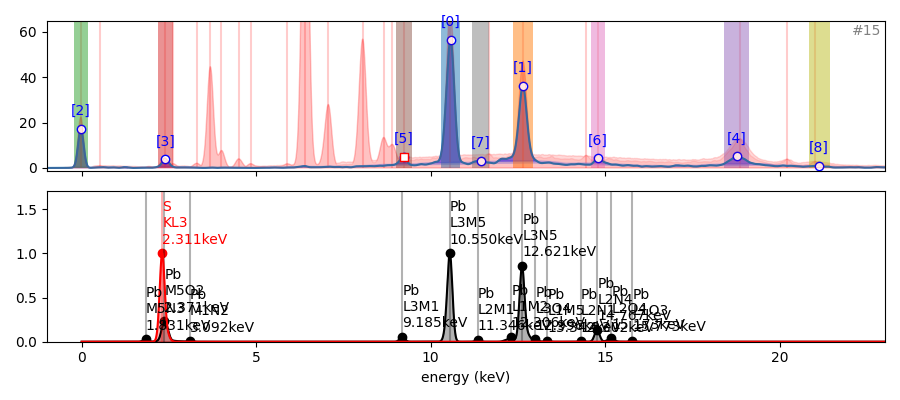

In [ ]:
import moseley as mos 
fig, [ax, ax1] = plt.subplots(nrows=2, sharex=True, figsize=[9, 4])
hma.plot_spectrum(n, ax=ax) 
plot_peakslices(x_keVs, slices, ax=ax);

ax1.set_ylim([0, 1.7])

mos.XFluo('Pb', tube_keV=30).plot(ax=ax1, color='k', peak_labels='full')
mos.XFluo('S', tube_keV=30).plot(ax=ax1, color='r', peak_labels='full')

<IPython.core.display.Javascript object>


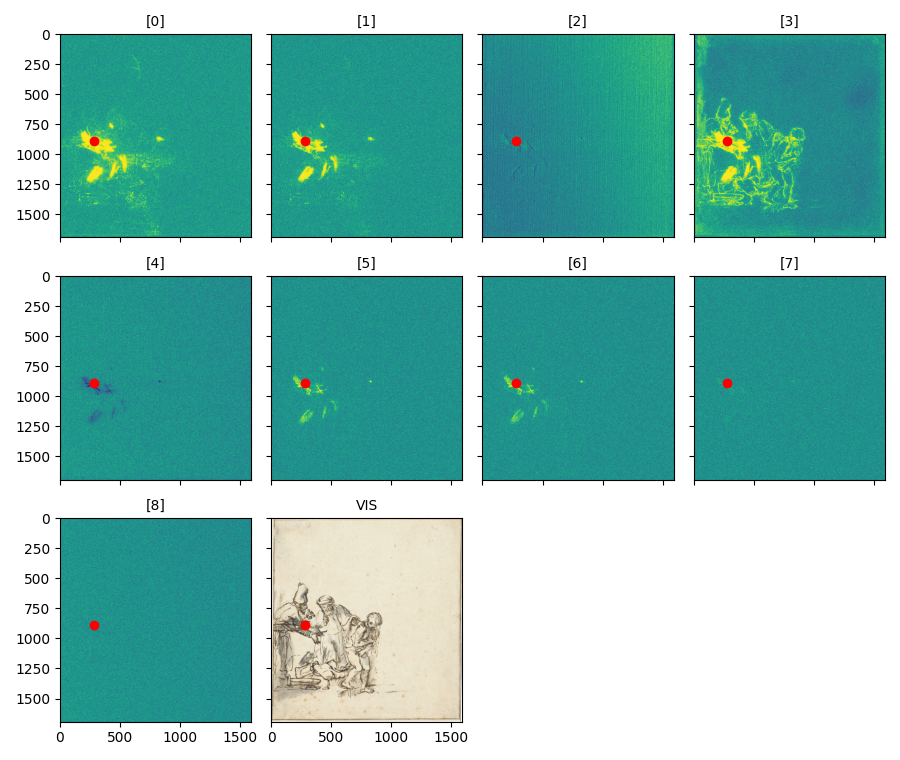

In [ ]:
titles = [f'[{i}]' for i in range(len(slices))]
titles.append('VIS')

peak_maps_histeq = [ske.equalize_hist(pm) for pm in peak_maps]

multi_plot(*peak_maps_histeq, imvis_reg, titles=titles, hot_pixel=hot_pixel);

This is most interesting. Let's take a look at the keV map for the overlapping band of sulfur and lead. For sulfur this is the S_KL3 band at 2.311 keV. For lead this is the Pb_M5O2 band and 2.372 keV. 

In [ ]:
mid_keV = (2.311 + 2.371) / 2

In [ ]:
SKa_keV_map = keV_maps[3]

<IPython.core.display.Javascript object>


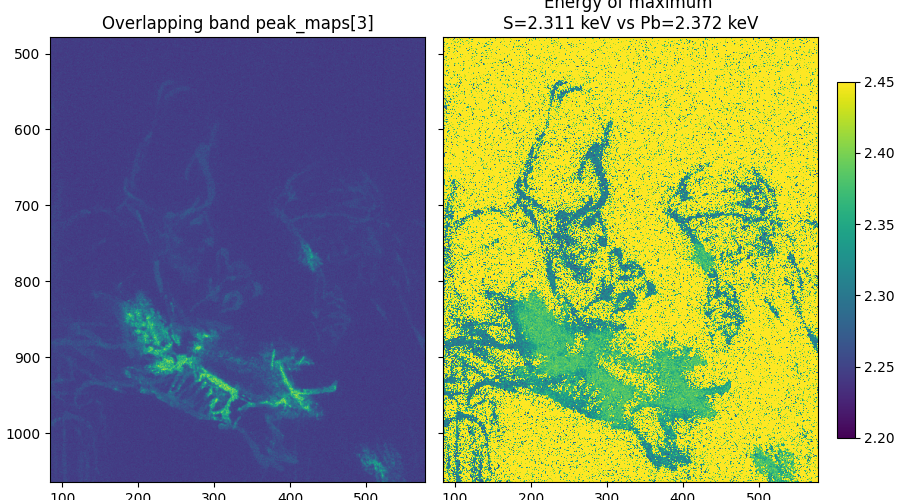

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=[9, 5], constrained_layout=True)

ax.imshow(peak_maps[3])
ax.set_title('Overlapping band peak_maps[3]')
pos = ax1.imshow(SKa_keV_map, vmin=2.2, vmax=2.45)
fig.colorbar(pos, ax=ax1, shrink=0.8)
ax1.set_title('Energy of maximum \nS=2.311 keV vs Pb=2.372 keV');

## API

Ok, this is the new Gaussian code base. For now we do not return the fancy peak shape parameters to deconvolve overlapping bands. Soon this will be necessary. For now let's simply take a look at the peak maps... 

In [ ]:
#export 

import numpy as np 
import scipy.interpolate as sip
import scipy.signal as ssg 
from maxrf4u import DataStack, HotmaxAtlas 
from dask.diagnostics import ProgressBar 
import matplotlib.pyplot as plt 
import skimage.exposure as ske 

def gaussian(x, x0, sigma): 
    '''Normal distribution around `x0` with standard deviation `sigma`.'''
    
    y = np.exp(-0.5 * ((x - x0) / sigma)**2)
    
    return y 


def fit_gaussian(x, y, peak_idx, rel_height=0.2, baseline=None): 
    '''Fit single gaussian distribution at `rel_height`. 
    
    Returns: `y_gauss`, `baseline`
    '''
    
    # just a single peak 
    [widths], [width_height], [left_ips], [right_ips] = ssg.peak_widths(y, [peak_idx], rel_height=rel_height)
    
    # create energy interpolation 
    keV_ipol = sip.interp1d(np.arange(len(x)), x)
     
    left_x = keV_ipol(left_ips)
    right_x = keV_ipol(right_ips)
    
    # pick smallest half width at rel_height 
    dx_left = left_x - x[peak_idx] 
    dx_right = right_x - x[peak_idx] 
    
    dx = sorted([dx_left, dx_right])[0] 
    
    # correct for baseline 
    if baseline is None:  
        baseline = np.zeros_like(y) 
        
    y_norm = (width_height - baseline[peak_idx]) / (y[peak_idx] - baseline[peak_idx]) 
        
    # calculate corresponding sigma 
    
    sigma = np.sqrt(-dx**2 / (2 * np.log(y_norm)))
    
    # calculate gaussian with baseline 
    
    y_gauss = (y[peak_idx] - baseline[peak_idx]) * gaussian(x, x[peak_idx], sigma) + baseline
    
    return y_gauss, baseline 
    
    

def plot_peakslices(x, slices, ax=None, y=None, labels=False): 
    '''Plot peak slice regions'''
    
    if ax is None: 
        fig, ax = plt.subplots(figsize=[8, 3]) 
        
    # plot spectrum if provided     
    if y is not None:      
        ax.plot(x, y) 
        ax.set_ylim([-2, 1.15 * y.max()])
        
    ylim = ax.get_ylim()[1] 
    
    ones = np.ones_like(x)
    
    for i, s in enumerate(slices): 
        
        is_in_slice = np.zeros_like(x).astype(bool)
        left_idx, mid_idx, right_idx = s 
        is_in_slice[left_idx:right_idx + 1] = True
        
        # left 
        # xi, yi = x_keVs[left_idx], y[left_idx]
        # ax.scatter(xi, yi, color='red', marker='|') 

        # right
        # xi, yi = x_keVs[right_idx], y[right_idx]
        # ax.scatter(xi, yi, color='green', marker='|') 
        
        # middle 
        # xi, yi = x_keVs[mid_idx], y[mid_idx]
        # ax.scatter(xi, yi, color='orange', marker='|') 
        
        ax.fill_between(x, ylim * ones,  where=is_in_slice, alpha=0.5, zorder=-10)
        
        if labels: 
            ax.annotate(f'[{i}]', [x[mid_idx], ylim], xytext=[0, -14], color='k', 
                    textcoords='offset points', ha='center')
        
        
    return ax 


def get_peakmaps(slices, datastack_file, norm=False): 
    '''Integrate peak `slices`  into peak maps and keV maps. 
    
    Returns: peak_maps, keV_maps'''
    
    ds = DataStack(datastack_file)
    x_keVs = ds.read('maxrf_energies')
    cube = ds.read('maxrf_cube', compute=False) # don't load into memory yet (too big)
    
    peak_maps = []
    keV_maps = []
    
    with ProgressBar(): 

        for i, [si, sj, sk] in enumerate(slices): 

            print(f'Computing slice {i}/{len(slices)-1}')#, end='\r')

            peak_slice = cube[:,:,si:sk+1].compute() 

            d = sk - si 

            peak_map = np.sum(peak_slice, axis=2) / d - (peak_slice[:,:,0] + peak_slice[:,:,-1]) / 2 

            if norm:  
                peak_map = peak_map / peak_map.max()
                # no zero clipping to study better the low signal noise 
                # peak_map = np.clip(peak_map, a_min=0, a_max=1)

            keV_idx_map = si + np.argmax(peak_slice, axis=2)
            keV_map = x_keVs[keV_idx_map]

            peak_maps.append(peak_map) 
            keV_maps.append(keV_map)
        
    return peak_maps, keV_maps  


def multi_plot(*images, hot_pixel=None, titles=None, roi_list=None, axis_off=False, 
               sharex=True, sharey=True, vmin=None, vmax=None, cmap='viridis', 
               fontsize='medium', zoom_xyc=None, zoom_half_wh=[100, 100]): 
    '''Inspect multiple images simultaneously... 
    
    Fold along multiple rows if n > 4'''
    
    nrows_max = 4 
    n_img = len(images)
    
    nrows = (n_img // nrows_max) # completely filled rows 
    rest = n_img % nrows_max 
    if rest != 0:
        nrows = nrows + 1
    
    if n_img <= nrows_max: 
        ncols = n_img
    else: 
        ncols = nrows_max
        
    figsize = [9, 5 + 1.3 * (nrows -1)]
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False, sharex=sharex, sharey=sharey)
    
    for i, img in enumerate(images): 
    
        axs.flatten()[i].imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
        
        if hot_pixel is not None: 
            hot_yi, hot_xi, hot_zi = hot_pixel 
            axs.flatten()[i].scatter(hot_xi, hot_yi, color='r')
        
        if zoom_xyc is not None:
            xc, yc = zoom_xyc
            w_ha, h_ha = zoom_half_wh 

            axs.flatten()[i].set_xlim(xc - w_ha, xc + w_ha)
            axs.flatten()[i].set_ylim(yc + h_ha, yc - h_ha)
        
        if roi_list is not None: 
            add_roi_patches(axs.flatten()[i], roi_list)
            
    if titles is not None:
        for i, t in enumerate(titles): 
            axs.flatten()[i].set_title(t, fontsize=fontsize)
    
    # seems to have no effect: 
    for i in range(n_img, nrows * ncols): 
        axs.flatten()[i].axis('off')
    # therefore trying this: 
    if axis_off: 
        axs_flat = axs.flatten()
        for ax in axs_flat: 
            ax.set_axis_off()
        
    fig.subplots_adjust(hspace=0.1, wspace=0.1)    
            
    plt.tight_layout()
    
    return fig, axs 



def get_slices(x_keVs, y_hot, peak_idxs, rel_height=0.2, clip_level=0.05, baseline=None): 
    '''Based on single Gaussian peak fit for each peak slice. 
    
    Returns `peak_slices`''' 
    
    peak_slices = []
    
    for peak_idx in peak_idxs: 
    
        y_gauss, baseline = fit_gaussian(x_keVs, y_hot, peak_idx, rel_height=0.2, baseline=baseline)
        y_gauss_norm = (y_gauss - baseline) / (y_gauss - baseline).max()
        is_above_clip = y_gauss_norm > clip_level 
        indexes = np.argwhere(is_above_clip).flatten()
        left_mid_right = [indexes[0], peak_idx, indexes[-1]]
        
        peak_slices.append(left_mid_right)
        
    peak_slices = np.array(peak_slices)
    
    return peak_slices 


def get_hotslices(datastack_file, n, rel_height=0.2, clip_level=0.05): 
    '''Get slices for specifically for hotmax spectrum `n` in `datastack_file`.
    
    Using noiseline as peakbase. 

    
    Returns: `peak_slices`
    '''
    
    # populate required hotmax spectrum attributes 
    hma = HotmaxAtlas(datastack_file)
    
    x_keVs = hma.x_keVs
    y_hot = hma.hotmax_spectra[n]
    peak_idxs = hma.peak_idxs_list[n] 
    noiseline = hma.noiselines[n]
    
    slices = get_slices(x_keVs, y_hot, peak_idxs, rel_height=0.2, clip_level=0.05, baseline=noiseline) 
    
    return slices 